## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import itertools

## For visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Importing 'Country-Metadata' sheet

In [2]:
df_country_metadata = pd.read_excel('../data-sets/IDS_ALLCountries.xlsx', sheet_name=1)
df_country_metadata.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",Fiscal year end: March 20; reporting period fo...,...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,2000.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2020 (expected),"Demographic and Health Survey, 2017/18",NaN,...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,2006.0,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Lower middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2020 (expected),"Multiple Indicator Cluster Survey, 2018/19",NaN,...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.0,2017.0,2012.0,DZ,DZ,Algeria,Algeria
3,AGO,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,IBRD,NaN,Angolan kwanza,2014,"Demographic and Health Survey, 2015/16",NaN,...,"Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,2005.0,AO,AO,Angola,Angola
4,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,IBRD,NaN,Argentine peso,2020 (expected),"Multiple Indicator Cluster Survey, 2019/20",NaN,...,"Integrated household survey (IHS), 2016",Yes,2008,2002.0,2018.0,2011.0,AR,AR,Argentina,Argentina


## Importing the entire data-set

In [3]:
df = pd.read_excel('../data-sets/IDS_ALLCountries.xlsx')
df.head()

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,...,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
77379,Zimbabwe,ZWE,World,WLD,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,...,1.288433e+09,1.242814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77380,Zimbabwe,ZWE,World,WLD,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,...,1.653750e+07,1.696151e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77381,Zimbabwe,ZWE,World,WLD,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,...,1.304971e+09,1.259775e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77382,Zimbabwe,ZWE,World,WLD,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,0.0,0.0,0.0,0.0,...,4.681985e+08,4.876475e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77383,Zimbabwe,ZWE,World,WLD,"Use of IMF credit, SDR allocations (DOD, curre...",DT.DOD.DSDR.CD,NaN,NaN,NaN,NaN,...,4.681985e+08,4.876475e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing the spaces in-between the column headings 

In [5]:
## Taking the columns out and storing it in a list
column_headers = list(df.columns.values)
print("The Column Header : ", column_headers)

The Column Header :  ['Country Name', 'Country Code', 'Counterpart-Area Name', 'Counterpart-Area Code', 'Series Name', 'Series Code', 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028]


In [6]:
## Removing the spaces
for i in range(len(column_headers)):
    if isinstance(column_headers[i], str):
        column_headers[i] = column_headers[i].replace(' ', '_')  ## space to _
        column_headers[i] = column_headers[i].replace('-', '_') ## - to _

In [7]:
## Spaces are removed
print("The Column Header :", column_headers)

The Column Header : ['Country_Name', 'Country_Code', 'Counterpart_Area_Name', 'Counterpart_Area_Code', 'Series_Name', 'Series_Code', 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028]


In [8]:
## Applying the modified columns back into the data-set
df.columns = column_headers
df.head()

,Country_Name,Country_Code,Counterpart_Area_Name,Counterpart_Area_Code,Series_Name,Series_Code,1970,1971,1972,1973,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,...,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77384 entries, 0 to 77383
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country_Name           77384 non-null  object 
 1   Country_Code           77384 non-null  object 
 2   Counterpart_Area_Name  77384 non-null  object 
 3   Counterpart_Area_Code  77384 non-null  object 
 4   Series_Name            77384 non-null  object 
 5   Series_Code            77384 non-null  object 
 6   1970                   34993 non-null  float64
 7   1971                   35843 non-null  float64
 8   1972                   36576 non-null  float64
 9   1973                   37360 non-null  float64
 10  1974                   37913 non-null  float64
 11  1975                   38687 non-null  float64
 12  1976                   39165 non-null  float64
 13  1977                   40056 non-null  float64
 14  1978                   40714 non-null  float64
 15  19

In [10]:
df.isnull().sum()

Country_Name                 0
Country_Code                 0
Counterpart_Area_Name        0
Counterpart_Area_Code        0
Series_Name                  0
                         ...  
2024                     65250
2025                     65550
2026                     65773
2027                     65916
2028                     66252
Length: 65, dtype: int64

In [11]:
df.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
count,3.499300e+04,3.584300e+04,3.657600e+04,3.736000e+04,3.791300e+04,3.868700e+04,3.916500e+04,4.005600e+04,4.071400e+04,4.099100e+04,...,5.002100e+04,5.041100e+04,1.245900e+04,1.237700e+04,1.225400e+04,1.213400e+04,1.183400e+04,1.161100e+04,1.146800e+04,1.113200e+04
mean,2.418032e+08,2.615075e+08,2.960808e+08,3.708542e+08,4.697522e+08,5.624011e+08,6.298891e+08,7.691485e+08,9.111954e+08,1.087913e+09,...,1.522064e+10,1.526919e+10,5.242486e+09,4.701606e+09,4.419949e+09,4.149007e+09,3.973974e+09,3.084962e+09,2.954229e+09,3.065632e+09
std,5.287999e+09,5.676281e+09,6.335209e+09,7.936192e+09,9.931047e+09,1.093636e+10,1.174204e+10,1.321509e+10,1.436936e+10,1.698453e+10,...,2.886529e+11,2.811448e+11,3.476406e+10,2.991222e+10,2.752301e+10,2.418225e+10,2.332526e+10,1.706810e+10,1.613358e+10,1.663681e+10
min,-1.684299e+09,-2.095143e+09,-4.723625e+08,-2.899000e+08,-3.117914e+09,-1.393498e+10,-1.060234e+10,-1.485314e+10,-2.658528e+10,-1.963556e+10,...,-1.338406e+11,-1.257012e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.220000e-02,2.380550e+00,6.050350e+00,7.668257e+00,1.392980e+01,2.182210e+01,4.111829e+01,1.201814e+02,3.000000e+03,5.000000e+03,...,1.163781e+00,5.140000e-02,1.343719e+07,1.388824e+07,1.379260e+07,1.272786e+07,1.263271e+07,1.168700e+07,1.000000e+07,8.588643e+06
50%,1.654475e+06,1.826000e+06,2.359205e+06,2.848000e+06,3.481873e+06,4.510768e+06,5.107200e+06,6.612052e+06,7.480864e+06,9.306000e+06,...,2.845400e+07,2.858300e+07,1.229288e+08,1.245334e+08,1.227250e+08,1.169949e+08,1.145540e+08,9.867047e+07,9.149800e+07,8.066908e+07
75%,2.174353e+07,2.423075e+07,3.030630e+07,3.611921e+07,4.597607e+07,5.677565e+07,6.161305e+07,7.562230e+07,9.000000e+07,1.076840e+08,...,6.728168e+08,6.925054e+08,9.493626e+08,9.276454e+08,8.759689e+08,8.497433e+08,7.577243e+08,6.832353e+08,6.911090e+08,6.063123e+08
max,5.843442e+11,6.310939e+11,7.092432e+11,8.970182e+11,1.137398e+12,1.258788e+12,1.351730e+12,1.516241e+12,1.631683e+12,1.928798e+12,...,3.101835e+13,2.987922e+13,1.065068e+12,9.303373e+11,8.574516e+11,7.362402e+11,6.609430e+11,4.867220e+11,4.483407e+11,4.294499e+11


In [12]:
print("Number of Rows : ",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows :  77384
Number of Columns :  65


## Converting out data-set into data-base

In [13]:
## connect to a database
connection1 = sqlite3.connect("all_countries1.db") 

## store your table in the database
df.to_sql('all_countries1', connection1)

In [14]:
## connect to a database
connection2 = sqlite3.connect("all_countries2.db") 

## store your table in the database
df_country_metadata.to_sql('all_countries2', connection2)

/Users/prashanthsingaravelan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [15]:
query = "select * from all_countries1"
ans1 = pd.read_sql(query, connection1)
ans1.head()

,index,Country_Name,Country_Code,Counterpart_Area_Name,Counterpart_Area_Code,Series_Name,Series_Code,1970,1971,1972,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,...,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,...,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,...,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Finding the number of distinct countries

In [17]:
query2 = 'select distinct Country_Name from all_countries1'
distinct_countries = pd.read_sql(query2, connection1)

distinct_countries.head()

,Country_Name
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina


In [18]:
distinct_countries = distinct_countries.values.tolist()                               ## data-frame to 2d list
distinct_countries = list(itertools.chain.from_iterable(distinct_countries)) ## 2d list to 1d list

print("Number of Distinct Countries : ",len(distinct_countries))

Number of Distinct Countries :  136


## 3) Finding out the distinct debt indicators

In [19]:
query3 = 'select distinct Series_Code as "Distinct Dept Indicator" from all_countries1'
ans3 = pd.read_sql(query3, connection1)

ans3.head()

,Distinct Dept Indicator
0,DT.GPA.DPPG
1,DT.GPA.OFFT
2,DT.GPA.PRVT
3,DT.GRE.DPPG
4,DT.GRE.OFFT


In [20]:
print("Number of Distinct Countries : ",len(ans3))

Number of Distinct Countries :  569


## 4) Totaling the amount of debt owed by the countries

In [21]:
debt_years = []
for i in range(len(column_headers)):
    if isinstance(column_headers[i], int):
        debt_years.append(column_headers[i])

print(debt_years)

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028]


In [23]:
query = 'select distinct Country_Code from all_countries1'
country_code = pd.read_sql(query, connection1)

country_code = country_code.values.tolist() ## data-frame to 2d list
country_code = list(itertools.chain.from_iterable(country_code)) ## 2d list to 1d list

print('Distinct Country Code : ')
print(country_code)

Distinct Country Code : 
['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AZE', 'BGD', 'BLR', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAF', 'TCD', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'DJI', 'DMA', 'DOM', 'EAP', 'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'ECA', 'FJI', 'GAB', 'GMB', 'GEO', 'GHA', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'IDX', 'IND', 'IDN', 'IRN', 'JAM', 'JOR', 'KAZ', 'KEN', 'XKX', 'KGZ', 'LAO', 'LAC', 'LDC', 'LBN', 'LSO', 'LBR', 'LMY', 'LIC', 'LMC', 'MDG', 'MWI', 'MDV', 'MLI', 'MRT', 'MUS', 'MEX', 'MNA', 'MIC', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NPL', 'NIC', 'NER', 'NGA', 'MKD', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'ROU', 'RUS', 'RWA', 'WSM', 'STP', 'SEN', 'SRB', 'SLE', 'SLB', 'SOM', 'ZAF', 'SAS', 'LKA', 'LCA', 'VCT', 'SSA', 'SDN', 'SYR', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TUN', 'TUR', 'TKM', 'UGA', 'UKR', 'UMC', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']


In [25]:
## separating info according to the country
country_wise_info = []
for i in range(len(country_code)):
    query_with_countr_code = "select * from all_countries1 where Country_Code like '%{}%' ".format(country_code[i])
    ans = pd.read_sql(query_with_countr_code, connection1)
    country_wise_info.append(ans)

In [26]:
## from the separated country taking only debt info
country_wise_debt_info = []
for i in range(len(country_code)):
    debt_years = country_wise_info[i].iloc[:,7:66] ## From 1970 to 2028
    country_wise_debt_info.append(debt_years)

In [27]:
country_wise_year_debt = []
country_wise_total_debt = []
for i in range(len(country_code)):
    year_debt = country_wise_debt_info[i].sum()
    
    country_wise_year_debt.append(year_debt)          ## country and their year wise debt
    country_wise_total_debt.append(sum(year_debt)) ## country and their total debt

In [57]:
country_wise_total_debt

[103.6971,
 217.0864,
 164.48100000000002,
 70.85300000000001,
 272.8427000000001,
 224.73580000000004,
 151.5883,
 426.23720000000014,
 101.91250000000001,
 250.52839999999998,
 414.0720999999999,
 325.6833,
 307.87309999999997,
 143.2694,
 229.57720000000003,
 285.52370000000013,
 197.52479999999997,
 406.32,
 334.73319999999995,
 333.58020000000016,
 247.61520000000004,
 338.7,
 292.0315,
 335.4334,
 238.14429999999996,
 365.6398,
 299.1810000000001,
 254.9946,
 246.12950000000004,
 267.85140000000007,
 292.2429000000001,
 308.8082,
 279.9485,
 322.7676000000001,
 369.2922063890898,
 232.53850000000003,
 359.384,
 404.13840000000005,
 133.1521,
 323.0135000000001,
 367.84419999999994,
 311.714383034089,
 216.80640000000002,
 203.53399999999996,
 382.3864000000001,
 235.72229999999996,
 374.6461,
 295.072,
 323.62580000000014,
 366.90489999999994,
 322.6338,
 371.19949999999994,
 265.8364,
 362.93480000000005,
 375.72465152327095,
 344.25919999999996,
 433.2649,
 86.35089999999998,
 

In [28]:
data_tuples = list(zip(country_code, distinct_countries, country_wise_total_debt))
total_debt   = pd.DataFrame(data_tuples, columns=['Country-Code', 'Country-Name', 'Total Debt'])
total_debt.head()

,Country-Code,Country-Name,Total Debt
0,AFG,Afghanistan,103.6971
1,ALB,Albania,217.0864
2,DZA,Algeria,164.4810
3,AGO,Angola,70.8530
4,ARG,Argentina,272.8427


In [29]:
total_debt = total_debt.sort_values(['Total Debt'], ascending=[True])

In [30]:
total_debt.head()

,Country-Code,Country-Name,Total Debt
116,SYR,Syrian Arab Republic,24.2127
62,XKX,Kosovo,38.0396
120,TLS,Timor-Leste,53.5691
84,MNE,Montenegro,65.4745
3,AGO,Angola,70.8530


In [31]:
total_debt.tail()

,Country-Code,Country-Name,Total Debt
7,BGD,Bangladesh,426.2372
56,IDN,Indonesia,433.2649
94,PAN,Panama,437.3369
88,NPL,Nepal,451.5929
64,LAO,Lao PDR,628.2732


In [32]:
## Some of the Coutry-Code are mismatching. So we have to remove them

In [33]:
print(len(total_debt['Country-Code']))
print(len(df_country_metadata['Code']))

136
136


In [34]:
print(len(total_debt['Country-Name']))
print(len(df_country_metadata['Code']))

136
136


In [35]:
total_debt.to_excel('total_debt.xlsx')

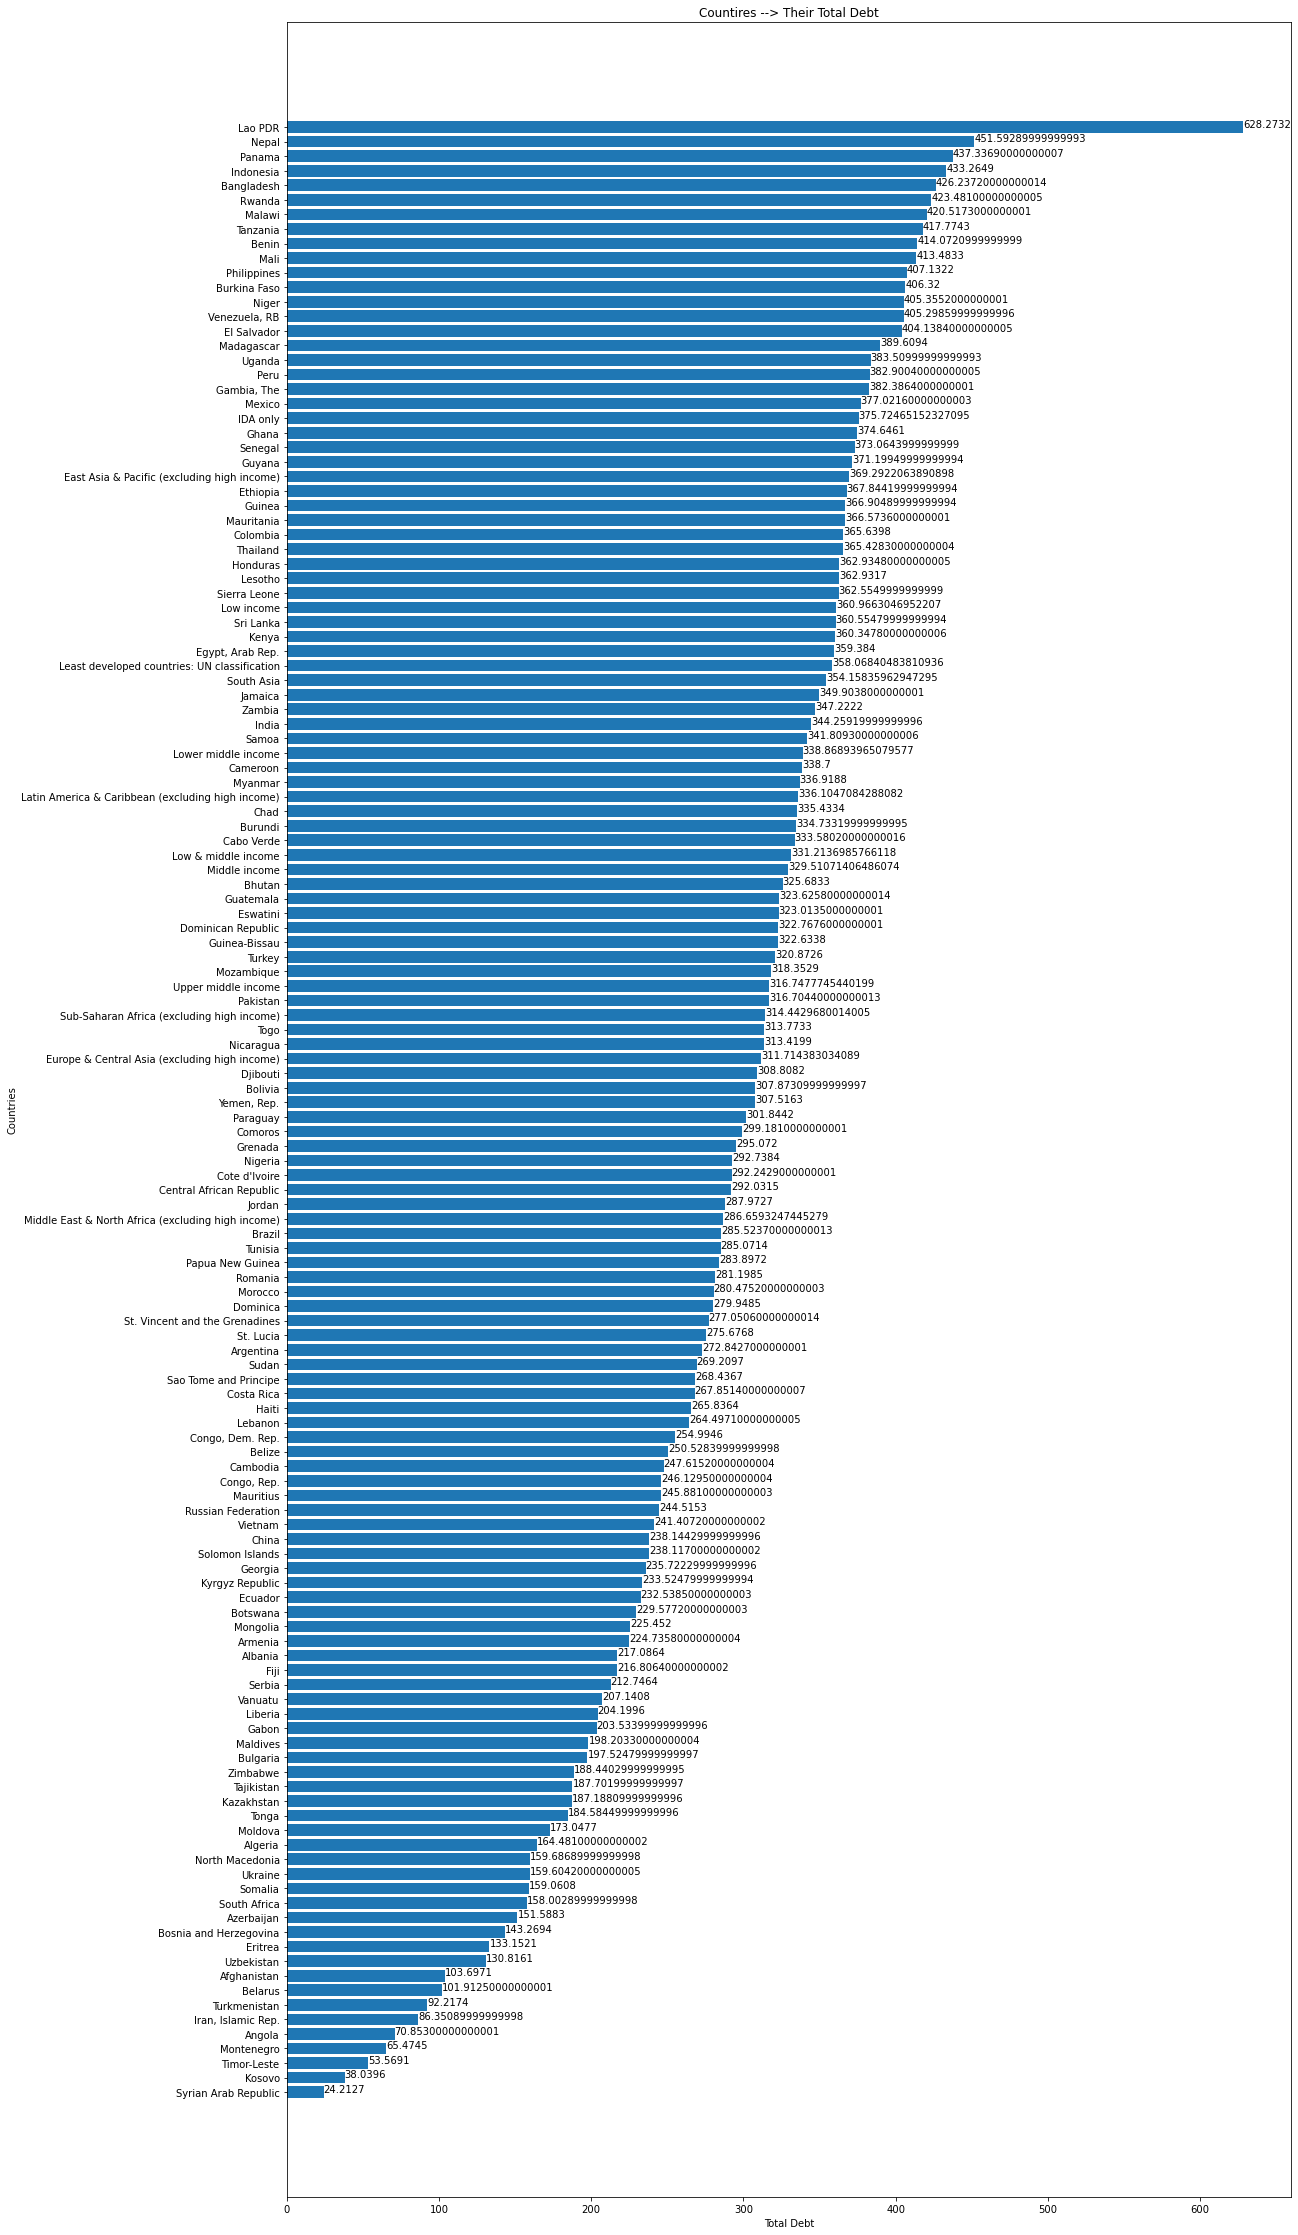

In [36]:
# Figure Size
fig, ax = plt.subplots(figsize =(18, 40))
 
# Horizontal Bar Plot
plt.barh(total_debt['Country-Name'], total_debt['Total Debt'])
 
# setting label of y-axis
plt.ylabel("Countries")
 
# setting label of x-axis
plt.xlabel("Total Debt")

for index, value in enumerate(total_debt['Total Debt']):
    plt.text(value, index, str(value))

plt.title("Countires --> Their Total Debt")
plt.show()

In [37]:
country_wise_debt_info

[   1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  ...     2019  \
 0  None  None  None  None  None  None  None  None  None  None  ...  17.9041   
 
   2020  2021  2022  2023  2024  2025  2026  2027  2028  
 0  0.0  None  None  None  None  None  None  None  None  
 
 [1 rows x 59 columns],
    1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  ...   2019  \
 0  None  None  None  None  None  None  None  None  None  None  ...  4.227   
 
      2020  2021  2022  2023  2024  2025  2026  2027  2028  
 0  5.3196  None  None  None  None  None  None  None  None  
 
 [1 rows x 59 columns],
      1970    1971    1972    1973    1974    1975    1976   1977    1978  \
 0  3.5975  5.6583  3.5625  6.0919  4.2026  3.5273  3.6278  3.847  3.9795   
 
      1979  ...  2019  2020  2021  2022  2023  2024  2025  2026  2027  2028  
 0  4.0147  ...   0.0   0.0  None  None  None  None  None  None  None  None  
 
 [1 rows x 59 columns],
    1970  1971  1972  1973  1974  1975  1976  1977  

In [40]:
country_wise_year_debt

[1970          0
 1971          0
 1972          0
 1973          0
 1974          0
 1975          0
 1976          0
 1977          0
 1978          0
 1979          0
 1980          0
 1981          0
 1982          0
 1983          0
 1984          0
 1985          0
 1986          0
 1987          0
 1988          0
 1989          0
 1990          0
 1991          0
 1992          0
 1993          0
 1994          0
 1995          0
 1996          0
 1997          0
 1998          0
 1999          0
 2000          0
 2001          0
 2002          0
 2003          0
 2004          0
 2005          0
 2006      10.25
 2007     8.0833
 2008     9.9575
 2009        0.0
 2010     7.8333
 2011        0.0
 2012        0.0
 2013        0.0
 2014    29.8333
 2015        0.0
 2016        0.0
 2017    19.8356
 2018        0.0
 2019    17.9041
 2020        0.0
 2021          0
 2022          0
 2023          0
 2024          0
 2025          0
 2026          0
 2027          0
 2028         

In [41]:
country_wise_total_debt

[103.6971,
 217.0864,
 164.48100000000002,
 70.85300000000001,
 272.8427000000001,
 224.73580000000004,
 151.5883,
 426.23720000000014,
 101.91250000000001,
 250.52839999999998,
 414.0720999999999,
 325.6833,
 307.87309999999997,
 143.2694,
 229.57720000000003,
 285.52370000000013,
 197.52479999999997,
 406.32,
 334.73319999999995,
 333.58020000000016,
 247.61520000000004,
 338.7,
 292.0315,
 335.4334,
 238.14429999999996,
 365.6398,
 299.1810000000001,
 254.9946,
 246.12950000000004,
 267.85140000000007,
 292.2429000000001,
 308.8082,
 279.9485,
 322.7676000000001,
 369.2922063890898,
 232.53850000000003,
 359.384,
 404.13840000000005,
 133.1521,
 323.0135000000001,
 367.84419999999994,
 311.714383034089,
 216.80640000000002,
 203.53399999999996,
 382.3864000000001,
 235.72229999999996,
 374.6461,
 295.072,
 323.62580000000014,
 366.90489999999994,
 322.6338,
 371.19949999999994,
 265.8364,
 362.93480000000005,
 375.72465152327095,
 344.25919999999996,
 433.2649,
 86.35089999999998,
 

In [54]:
value = country_wise_info[0].iloc[:,7:66].sum()
value

1970          0
1971          0
1972          0
1973          0
1974          0
1975          0
1976          0
1977          0
1978          0
1979          0
1980          0
1981          0
1982          0
1983          0
1984          0
1985          0
1986          0
1987          0
1988          0
1989          0
1990          0
1991          0
1992          0
1993          0
1994          0
1995          0
1996          0
1997          0
1998          0
1999          0
2000          0
2001          0
2002          0
2003          0
2004          0
2005          0
2006      10.25
2007     8.0833
2008     9.9575
2009        0.0
2010     7.8333
2011        0.0
2012        0.0
2013        0.0
2014    29.8333
2015        0.0
2016        0.0
2017    19.8356
2018        0.0
2019    17.9041
2020        0.0
2021          0
2022          0
2023          0
2024          0
2025          0
2026          0
2027          0
2028          0
dtype: object

In [ ]:
value = country_wise_info[0].iloc[:,7:66].sum()
sum(value)

## 5) Country with the highest debt

In [ ]:
## China


## 6)Average amount of debt across indicators

## 7) The highest amount of principal repayments

## 8) The most common debt indicator

## 9) Other viable debt issues and conclusion

In [ ]:
df["Total_Debt"] = df. sum(axis=1)

In [ ]:
df.head()

In [ ]:
#df["Total_Debt"] = df. sum(axis=1)

# query4 = 'select Country_Name, Total_Debt from all_countries1 group by Country_Name'
# ans4 = pd.read_sql(query4, conn)

In [58]:
query4 = 'select distinct Country_Name from all_countries1'
distinct_countries = pd.read_sql(query4, conn)

NameError: name 'conn' is not defined

In [ ]:
distinct_countries

In [ ]:
df.columns